In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [73]:
demand = pd.read_csv('../data/20060206-20230614 NYISO Hourly Actual Load.csv')
demand['Date'] = pd.to_datetime(demand['Date'], format = '%m/%d/%Y %I:%M:%S %p')
demand.head()

,Date,Load,Zone
0,2006-02-06,228.6,MILLWD
1,2006-02-06,4636.4,N.Y.C.
2,2006-02-06,720.4,NORTH
3,2006-02-06,1660.0,WEST
4,2006-02-06,995.6,CAPITL


In [74]:

demand = (pd.pivot_table(demand, values = 'Load', columns = 'Zone', index = 'Date')
          .resample('M').max()
          .interpolate(method = 'linear')
          .shift(periods=-1, freq="m").shift(periods=1, freq="d")
          )

In [79]:
dem = pd.DataFrame()

dem['NYC'] = demand['N.Y.C.']
dem['LI'] = demand['LONGIL']
dem['GJ'] = demand[['HUD VL', 'MILLWD', 'DUNWOD', 'N.Y.C.']].sum(axis = 1)
dem['NYCA'] = demand.sum(axis = 1)

dem.tail()

,NYC,LI,GJ,NYCA
Date,,,,
2023-02-01,7070.1081,3078.2163,10010.1271,23483.3106
2023-03-01,6352.4402,2689.7146,8784.8587,20258.0949
2023-04-01,5640.5895,2220.2597,7679.0947,17506.2173
2023-05-01,6846.4006,2663.0440,9291.5298,21183.3698
2023-06-01,7455.9264,3157.5901,10567.3397,23369.6416


<Axes: xlabel='Date'>

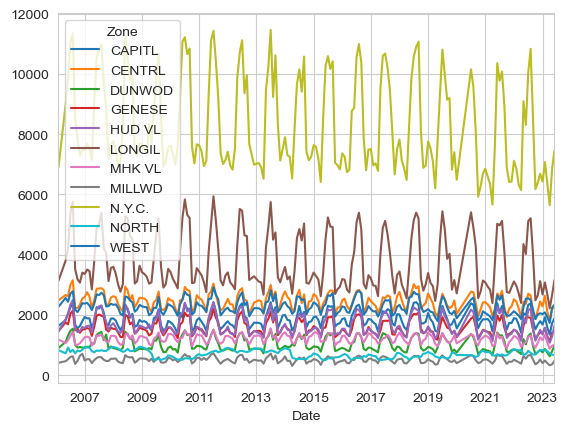

In [70]:
demand.plot()

In [80]:
dem.to_csv('demand.csv')